In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
path = r'C:\Users\e707088\Downloads'
file_name = 'Customer Sentiment Data.csv'
data = os.path.join(path, file_name)
df = pd.read_csv(data)


C:\Users\e707088\AppData\Local\Temp\ipykernel_27760\2903414231.py:4: DtypeWarning: Columns (13,15,16,18,32,34,36,37,41,45,46,55,71,83,84,86,87,90,91,92,96,98,100,101,103,104,105,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [4]:
df = df.drop(['CASEID', 'YYYYQ', 'YYYYMM'], axis=1)
s = df.corr().abs().unstack()

In [5]:
s.sort_values(kind='quicksort', ascending=False)

YYYY     YYYY       1.000000
NEWS1    NEWS1      1.000000
ICC      ICC        1.000000
ICE      ICE        1.000000
PAGO     PAGO       1.000000
                      ...   
HOM      NEWS2      0.000341
HOMEAMT  WT         0.000234
WT       HOMEAMT    0.000234
         UNEMP      0.000108
UNEMP    WT         0.000108
Length: 784, dtype: float64

In [6]:
s = s[s != 1]

In [7]:
s[s > .35]

YYYY     INCQFM     0.686135
         HOMEAMT    0.622158
         INVAMT     0.543287
ICS      ICC        0.737843
         ICE        0.887851
         PAGO       0.580157
         PEXP       0.476560
         RINC       0.372532
         BAGO       0.461268
         BEXP       0.415927
         BUS12      0.565783
         UNEMP      0.360062
         GOVT       0.387231
         DUR        0.455548
ICC      ICS        0.737843
         PAGO       0.747411
         PAGOR1     0.403850
         DUR        0.651478
ICE      ICS        0.887851
         PEXP       0.510480
         BAGO       0.434341
         BEXP       0.469593
         BUS12      0.619308
         UNEMP      0.396950
         GOVT       0.384121
PAGO     ICS        0.580157
         ICC        0.747411
         PAGOR1     0.552050
PAGOR1   ICC        0.403850
         PAGO       0.552050
PEXP     ICS        0.476560
         ICE        0.510480
RINC     ICS        0.372532
BAGO     ICS        0.461268
         ICE  

In [8]:
df_ml = df[['YYYY', 'ICS', 'PAGO']]

In [9]:
df_ml.columns

Index(['YYYY', 'ICS', 'PAGO'], dtype='object')

In [10]:
type(df_ml)

pandas.core.frame.DataFrame

In [11]:
df_ml.dtypes

YYYY      int64
ICS     float64
PAGO      int64
dtype: object

In [12]:
df_ml.corr()

,YYYY,ICS,PAGO
YYYY,1.000000,0.007334,-0.009121
ICS,0.007334,1.000000,-0.580157
PAGO,-0.009121,-0.580157,1.000000


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [14]:
X = df_ml[['YYYY', 'PAGO']]
y = df_ml['ICS']
X.head()

,YYYY,PAGO
0,1978,3
1,1978,1
2,1978,5
3,1978,1
4,1978,3


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Fit a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Fit an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Calculate mean squared error for each model
linear_mse = mean_squared_error(y_test, linear_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

# Print the results
print(f"Linear regression MSE: {linear_mse}")
print(f"Random forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")

Linear regression MSE: 996.4278681392475
Random forest MSE: 901.6091171712101
XGBoost MSE: 901.5855865187671


In [38]:
y_pred = linear_model.predict(X_train)
residuals = y_train - y_pred
residuals

10368     41.196250
162240    40.407749
82479     19.278292
266151    10.739361
106659    52.062100
            ...    
119879    34.054155
259178    40.343384
131932    25.627863
146867    63.648064
121958   -18.774092
Name: ICS, Length: 248259, dtype: float64

In [18]:
sum(residuals)/len(residuals) # mean residual

-2.567732508567416e-14

In [19]:
max(residuals), min(residuals)

(131.33263056439162, -78.10477519806582)

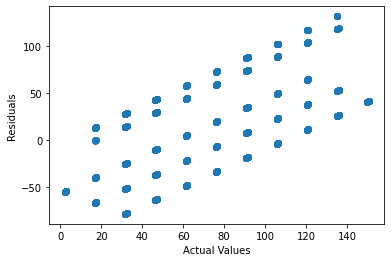

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_train, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

<AxesSubplot:xlabel='ICS'>

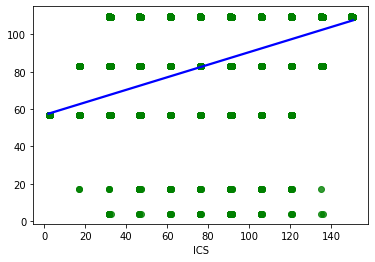

In [29]:
sns.regplot(y_test, linear_pred, scatter_kws={'color':'green'}, line_kws={'color':'blue'})

In [35]:
features = np.array([[2025, 5]])

In [39]:
xgb_model.predict(features)

array([37.656822], dtype=float32)